# NumPy

### Network programming
    * Sockets are the endpoints of bi directional communication channel. These sockets can communicate within a process, between processes on the same machine, or between the processes on the different machines. 
    * Sockets use different protocols for determining the connection type for port-to-port communication between clients and servers.

In [ ]:
# Script to connect to google.com using socket programming 
import socket # for socket
import sys

try:
	s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
	print ("Socket successfully created")
except socket.error as err:
  print ("socket creation failed with error %s" %(err))

# default port for socket
port = 80

try:
  host_ip = socket.gethostbyname('www.google.com')
  print ("connected to www.google.com: ", host_ip)

except socket.gaierror:
	# this means could not resolve the host
	print ("there was an error resolving the host")
	sys.exit()

# connecting to the server
s.connect((host_ip, port))



### Fetching web resources with urllib/urllib2
* URL Parsing
    * The URL parsing functions focus on splitting a URL string into its components, or on combining URL components into a URL string.

        * urlparse(urlstring, scheme='', allow_fragments=True)

            * Parse a URL into six components, returning a 6-item named tuple. Each tuple item is a string, possibly empty.

        * urlunparse(parts)
            * Construct a URL from a tuple as returned by urlparse(). The parts argument can be any six-item iterable.

        * urlsplit(urlstring, scheme='', allow_fragments=True)
            * This is similar to urlparse(), but does not split the params from the URL. 

        * urlunsplit(parts)
            * Combine the elements of a tuple as returned by urlsplit() into a complete URL as a string. The parts argument can be any five-item iterable.

        * urljoin(base, url, allow_fragments=True)
            * Construct a full (“absolute”) URL by combining a “base URL” (base) with another URL (url).


In [ ]:
import urllib.request
from urllib.parse import * 

webUrl = urllib.request.urlopen('http://some_url_here/')
print("result code: " + str(webUrl.getcode())) 

print(webUrl.read())
print()

url = urllib.request.urljoin('http://some_url_here', 'home.aspx')
request_url = urllib.request.urlopen(url)
print(request_url.read())

In [ ]:
parse_url = urlparse('http://some_url_here;param1=p1;param2=p2??a=b&c=d')
print(parse_url)
print()

unparse_url = urlunparse(parse_url)
print(unparse_url)
print()

In [ ]:
split_url = urlsplit('http://some_url_here;param1=p1;param2=p2??a=b&c=d')
print(split_url)
print()

unsplit_url = urlunsplit(split_url)
print(unsplit_url)

url = urllib.request.urljoin('http://some_url_here', 'home.aspx')
request_url = urllib.request.urlopen(url)
# print(request_url.read())

#### Creating client-server like applications using sockets
One socket(node) listens on a particular port at an IP, while the other socket reaches out to the other to form a connection.

The server is the listener socket while the client reaches out to the server. They are the real backbones behind web browsing. 
    
socket.socket(socket_family, socket_type, protocol=0)

    socket_family: Either AF_UNIX or AF_INET        
    socket_type: Either SOCK_STREAM or SOCK_DGRAM        
    protocol: Usually left out, defaulting to 0

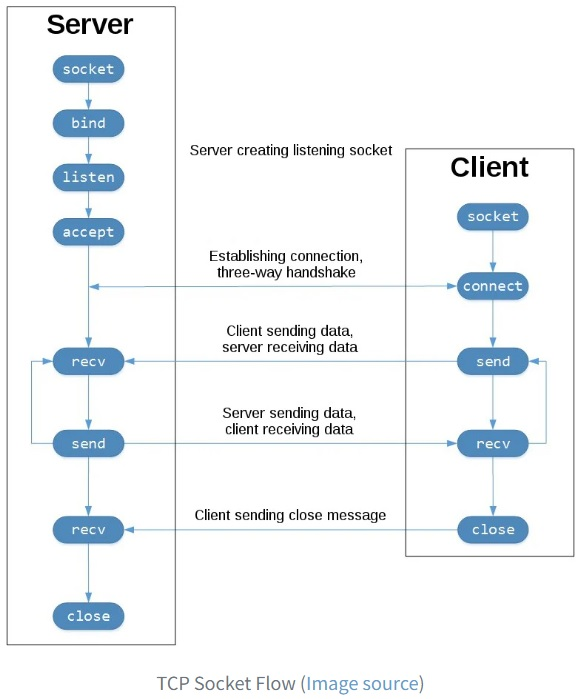

In [1]:
from IPython.display import Image
Image('TCP Socket Flow.jpg')

In [ ]:
import socket 
 
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
print(s)

In [ ]:
import socket 
 
s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
print(s)

In [2]:
!type socketserver.py

# to test this run the following command: telnet localhost 4567

import socket			

# create a socket object
s = socket.socket()		
print ("Socket successfully created")

# reserve a port on your computer 
port = 4567			

# Next bind to the port
# we have not typed any ip in the ip field instead we have an empty string
# this makes the server listen to requests coming from other computers 
s.bind(('', port))		
print ("socket binded to %s" %(port))

# put the socket into listening mode
s.listen(5)	# 5 connections can be in wait state. 6th connection is refused
print ("socket is listening")		

# a forever loop until we interrupt it or an error occurs
while True:
  # Establish connection with client.
  (clientsocket, addr) = s.accept()	
  print ('Got connection from', addr )

  # send message to the client. encoding to send byte type.
  clientsocket.send('Message from server to client'.encode())

  # Close the connection with the client
  clientsocket.close()

  # break once connection is c

In [ ]:
!type socketclient.py

#### We will execute both socketserver and socketclient using command prompt


### smtplib

The smtplib module defines an SMTP client session object that can be used to send mail to any Internet machine with an SMTP listener daemon.

* Password used for email would be encrypted. The encrypted password would be read and decrypted. The decrypted password is used for authenticating purpose

In [ ]:
# encrypt.py
# pip install cryptography

from cryptography.fernet import Fernet

def generate_key():
    # Generates a key and save it into a file
    key = Fernet.generate_key()
    with open("secret.key", "wb") as key_file:
        key_file.write(key)

def load_key():
    # Load the previously generated key
    return open("secret.key", "rb").read()

def encrypt_message(message):
    # Encrypts a message
    key = load_key()
    encoded_message = message.encode()
    f = Fernet(key)
    encrypted_message = f.encrypt(encoded_message)

    # Write the encrypted message to file
    with open("encryptedPwd.txt", "wb") as pwdFile:
        pwdFile.write(encrypted_message)

if __name__ == "__main__":
    generate_key()
    password = "your password"
    encrypt_message(password)

In [ ]:
# decrpyt.py

from cryptography.fernet import Fernet

def load_key():
    # Load the previously generated key
    return open("secret.key", "rb").read()

def decrypt_message(encrypted_message):
    # Decrypts an encrypted message
    key = load_key()
    f = Fernet(key)
    decrypted_message = f.decrypt(encrypted_message)

if __name__ == "__main__":
  with open("encryptedPwd.txt", "rb") as pwdFile:
    decryptedPwd = pwdFile.read()

  print(decrypt_message(decryptedPwd))

#### SendMail

In [ ]:
# sendmail.py

import socket
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import codecs

from decrypt import decrypt_message

def getPassword():
  with open("encryptedPwd.txt", "rb") as pwdFile:
    decryptedPwd = pwdFile.read()

  return codecs.decode(decrypt_message(decryptedPwd))

password = getPassword()
fromaddr = ""
toaddr = "" 

# instance of MIMEMultipart
msg = MIMEMultipart()

msg['From'] = fromaddr
msg['To'] = toaddr

with open("email.txt", "r") as f:
  msgText = f.read()
 
msg['Subject'] = "From python code"
msg.attach(MIMEText(msgText, 'plain'))
server = smtplib.SMTP('smtp_server', 587)

# start TLS for security
server.starttls()
server.login(msg['From'], password)
server.sendmail(msg['From'], msg['To'], msg.as_string())
server.quit()

#### Send mail with attachment

In [ ]:
# libraries to be imported
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
import codecs

from decrypt import decrypt_message

def getPassword():
  with open("encryptedPwd.txt", "rb") as pwdFile:
    decryptedPwd = pwdFile.read()

  return codecs.decode(decrypt_message(decryptedPwd))

password = getPassword()
fromaddr = ""
toaddr = "" 

# instance of MIMEMultipart
msg = MIMEMultipart()

msg['From'] = fromaddr
msg['To'] = toaddr

# storing the subject
msg['Subject'] = "with attachment using Python code"

# string to store the body of the mail
with open("email.txt", "r") as f:
  msgText = f.read()

# attach the body with the msg instance
msg.attach(MIMEText(msgText, 'plain'))

# open the file to be sent
filename = "penguin.jpeg"
attachment = open(filename, "rb")

# instance of MIMEBase and named as p
p = MIMEBase('application', 'octet-stream')

# To change the payload into encoded form
p.set_payload((attachment).read())

# encode into base64
encoders.encode_base64(p)

p.add_header('Content-Disposition', "attachment; filename= %s" % filename)

# attach the instance 'p' to instance 'msg'
msg.attach(p)

# creates SMTP session
server = smtplib.SMTP('smtp server', 587)

# start TLS for security
server.starttls()

# Authentication
server.login(fromaddr, password)

# Converts the Multipart msg into a string
text = msg.as_string()

# sending the mail
server.sendmail(fromaddr, toaddr, text)

# terminating the session
server.quit()
